### Importing libraries

In [1]:
from keras.datasets import mnist
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical as np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

###Loading and spliting the dataset into training and test

In [3]:
# Loading and splitting the dataset into training and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [5]:
# let's print the shape of the dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_val shape", X_val.shape)
print("y_val shape", y_val.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (54000, 28, 28)
y_train shape (54000,)
X_val shape (6000, 28, 28)
y_val shape (6000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


###Visualizing outcome label

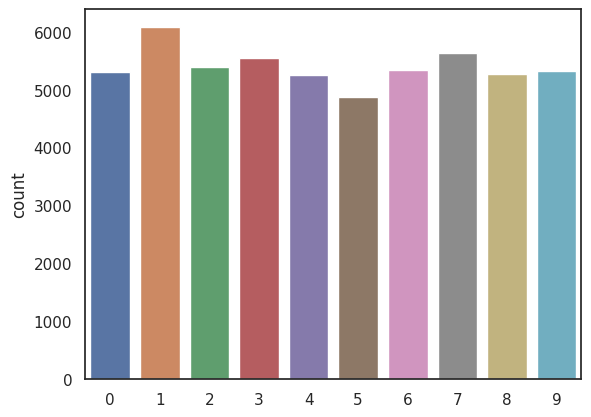

In [6]:
# Visualizing outcome label
sns.set(style='white', context='notebook', palette='deep')
g = sns.countplot(x=y_train)

In [7]:
Y_train_values=pd.DataFrame(y_train,columns=['label'])
Y_train_values.value_counts()

label
1        6088
7        5632
3        5542
2        5386
6        5338
9        5317
0        5299
8        5266
4        5262
5        4870
dtype: int64

###Pre Processing the data

In [9]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(X_train.shape[0], 784)
X_val = X_val.reshape(X_val.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_val /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils(y_train, n_classes)
Y_val = np_utils(y_val, n_classes)
Y_test = np_utils(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (54000,)
Shape after one-hot encoding:  (54000, 10)




###Implementing CNN

In [10]:

# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.3915 - accuracy: 0.8915 - val_loss: 0.2091 - val_accuracy: 0.9394
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1782 - accuracy: 0.9496 - val_loss: 0.1492 - val_accuracy: 0.9562
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1326 - accuracy: 0.9623 - val_loss: 0.1184 - val_accur

In [11]:
# training the model for 10 epochs with validation data
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_val, Y_val))


Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.0759 - val_accuracy: 0.9803
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.0755 - val_accuracy: 0.9800
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0764 - val_accuracy: 0.9812
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0801 - val_accuracy: 0.9800
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0843 - val_accuracy: 0.9783
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0808 - val_accuracy: 0.9807
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.0830 - val_accuracy: 0.9812
Epoch 

In [12]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 1s 2ms/step
7


### Testing the model

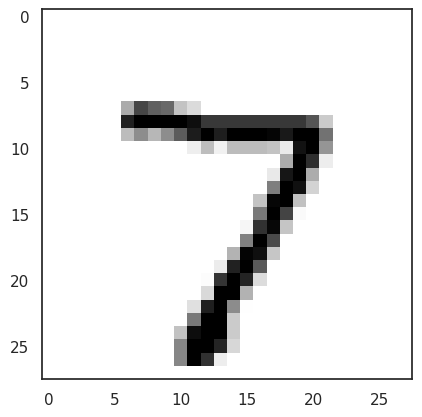

In [13]:
plt.imshow(X_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

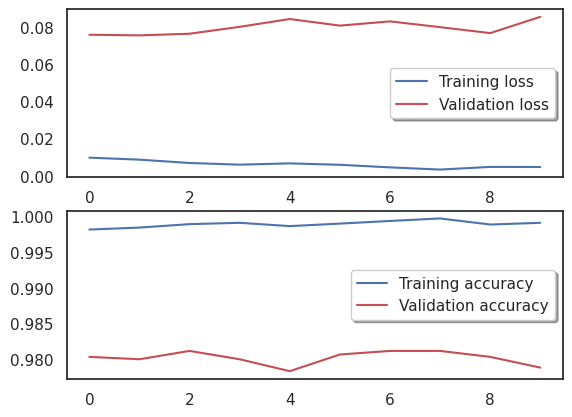

In [14]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9756
Test accuracy: 0.975600004196167
